## 1. Como consumir un servicio web

Generalmente los servicios web modernos consisten en URLs capaces de generar datos exclusivos para el consumo de aplicaciones, por ejemplo, devolver listas de productos, usuarios, o realizar operaciones hacia las bases de datos.

Los servicios web modernos se consumen mediante APIs con el formato JSON como la capa de datos.

En python podemos consumir los servicios web como peticiones web mediante `requests`.

In [5]:
# 1. Importar `requests`
import requests

results = 5
page = 1
seed = "123"
nat = ["us", "gb", "fr"]

# 2. Lanzar la petición y obtener la respuesta
response = requests.get(f"https://randomuser.me/api?results={results}&page={page}&seed={seed}&nat={','.join(nat)}")

# 3. Obtenemos los resultados de la respuesta convertidos a un diccionario de python
data = response.json()

# print(data) # {'results': [{'gender': 'male', 'name': {'title': 'Mr', 'first': 'Jared', 'last': 'Caldwell'}, ...

for user in data["results"]:
    print(user["name"]["title"], user["name"]["first"], user["name"]["last"])
    print(user["gender"], user["email"])
    print("-" * 40)

Mr Jared Caldwell
male jared.caldwell@example.com
----------------------------------------
Miss Victoria Leclerc
female victoria.leclerc@example.com
----------------------------------------
Mrs Léane Rolland
female leane.rolland@example.com
----------------------------------------
Mr Jar Chavez
male jar.chavez@example.com
----------------------------------------
Mr Clarence Dixon
male clarence.dixon@example.com
----------------------------------------


## 2. Descargar un archivo binario de internet

Generalmente los archivos que no son de texto son llamados archivos binarios y estos pueden estar alojados en servidores para ser consumidos desde internet mediante URLs.

En python podemos descargar estos archivos y guarlos en la computadora local.

In [15]:
# 1. Importar `requests`
response = requests.get("https://i.ytimg.com/vi/1Ne1hqOXKKI/maxresdefault.jpg")

# 2. Obtener el contenido descargado (binario)
data = response.content

print(len(data)) # 135,563 bytes ~ 130kb

# Podemos abrir un archivo en modo escritura binaria
f = open("datos/cat.jpg", "wb")

# Escribimos el contenido binario al archivo
f.write(data)

f.close()

135563


## 3. Descomprimir un archivo ZIP

Los archivos ZIP son archivos comprimidos o empaquetados cómo un único archivo binario para transportar múltiples archivos y carpetas, conservando su organización.

En python podemos descomprimir estos archivos usando librerías estándar como `zlib` o `gzip`.

In [18]:
from zipfile import ZipFile

fzip = ZipFile("datos/archivos.zip", "r")

name_list = fzip.namelist()

print(name_list)

# fzip.extract(<path>)
fzip.extractall("datos/output")

fzip.close()

['catalogo.xml', 'numeros.txt', 'usuarios.txt']


## 4. Comprimir un archivo ZIP

Para poder comprimir archivos ZIP es necesario dominar el manejo de las rutas del sistema operativo y poder caminar entre ellas.

En python podemos comprimir archivos independientes y carpetas para poder automatizar el reespaldo de archivos ignorando aquellos que no sean relevantes.

In [34]:
import os
from zipfile import ZipFile

def walk(path, targets=[]):
    for root, dirnames, filenames in os.walk(path):
        # for dirname in dirnames: # [foo]
        #     dirpath = f"{root}/{dirname}" # "datos/input/foo"
        #     walk(dirpath, targets=targets) # datos/input/foo
        for filename in filenames: # [correos.txt]
            filepath = f"{root}/{filename}" # "datos/input/correos.txt"
            targets.append(os.path.normcase(filepath), filename)
    return targets

targets = walk("datos/input")

print(targets)

fzip = ZipFile("datos/backup.zip", "w")

for filepath, filename in targets:
    fzip.write(filepath, filepath.replace(os.path.normcase("datos/input"), "")) # write(<source>, <destination>)

fzip.close()

[('datos\\input', 'datos\\input\\correos.txt', 'correos.txt'), ('datos\\input\\foo', 'datos\\input\\foo\\readme.md', 'readme.md'), ('datos\\input\\foo\\bar', 'datos\\input\\foo\\bar\\hello.txt', 'hello.txt')]


## 5. Extraer los correos de un archivo

Los correos electrónicos tienen una estructura regular la cuál puede ser intrerpretada por expresiones regulares y por lo tanto es información que puede ser extraída de forma automática.

En python podemos extraer información regular como correos, números de teléfono o cuentas bancarias, fechas, precios, nombres propios, etc. Esta información puede ser útil para generar reportes o crear bases de datos.

In [40]:
import re

pattern = r"[a-z\-\.\_]+\@[a-z]+\.[a-z]{2,3}(\.[a-z]{2,3})?" # A+ @ B+ . C{2,3} (. D{2,3})?

f = open("datos/conversacion.txt", "r")

content = f.read()

for match in re.finditer(pattern, content):
    print(match.group(0))

ana@gmail.com
pepe@gmail.com
karla@gmail.com
mario@gmail.com
berta@gmail.com


## 6. Consultar una base de datos MySQL

Las bases de datos SQL son las más populares ya que mantienen la información de forma relacional y poseen un lenguaje de comandos para poder recuperar datos tabulares.

En python podemos crear una conexión a la base de datos y lanzar consultas esperando los resultados.

In [10]:
import mysql.connector as mysql

conn = mysql.connect(host="localhost", user="root", password="password", database="almacen")

print("Se ha establecido la conexión a MySQL")

cur = conn.cursor()

cur.execute("SELECT nombre, descripcion FROM productos")

for record in cur:
    print(record) # record -> tuple(<field>, ...)

conn.close()

Se ha establecido la conexión a MySQL
('Pepsi', 'Refresco de cola')
('Coca', 'Refresco de cola')
('Chocoroll', 'Pan de chocolate')


In [9]:
import mysql.connector as mysql

conn = mysql.connect(host="localhost", user="root", password="password", database="almacen")

print("Se ha establecido la conexión a MySQL")

cur = conn.cursor()

nombre = input("Nombre: ")
descripcion = input("Descripcion: ")
imagen = input("Imagen: ")

sql = "INSERT INTO productos (nombre, descripcion, imagen) values (%s, %s, %s)"

data = (nombre, descripcion, imagen)

cur.execute(sql, data)

# INSERT, UPDATE, CREATE, DROP, ... necesitan hacer commit (enviar cambios)
conn.commit()

conn.close()

Se ha establecido la conexión a MySQL


Referencias:
* [MySQL con Python - W3Schools](https://www.w3schools.com/python/python_mysql_getstarted.asp)

Comando | Sintaxis | Descripción
--- | --- | ---
`SELECT` | `SELECT <fields / *> FROM <table> ...` | Permite consultar los registros de una tabla
`INSERT` | `INSERT INTO <table> (<field>, ...) VALUES (<value>, ...)` | Permite insertar un registro con valores. Usa `'<valor>'` si es de texto.
`UPDATE` | `UPDATE <table> SET <field>=<value> ... WHERE <field>=<value>` | Permite actualizar el valor de un campo de todos los registros filtrados para una tabla
`DELETE` | `DELETE FROM <table> WHERE <field>=<value>` | Permite eliminar los registros filtrados para una tabla

## 7. Consultar una base de datos MongoDB

Las bases de datos No-SQL se están popularizando por su facilidad de retener datos e información atómica no relacional. Esto permite un desarrollo acelarado en las empresas y se están consumiendo mucho. Las bases de datos No-SQL consisten en retener documentos similares a JSON con campos y valores (como un diccionario en python) y a través de filtros se especifican las búsquedas.

En python podemos crear una conexión a la base de datos y lanzar consultas esperando los resultados.

In [ ]:
! python -m pip install pymongo

In [26]:
import pymongo as mongo

conn = mongo.MongoClient("mongodb://localhost/tienda")

db = conn["tienda"]

products_coll = db["products"]

query = { "brand": "nike", "price": { "$gt": 100, "$lt": 120 } }

projection = { "_id": 0, "name": 1, "price": 1, "brand": 1, "existances": 1 }

products = products_coll.find(query, projection)

s = 0

for product in products:
    s += product["price"]
    print(product)

print("Total:", s)

conn.close()

{'name': 'Gorra nike 13', 'price': 101.20414063424556, 'existances': 55.0, 'brand': 'nike'}
{'name': 'Playera nike 13', 'price': 101.29263310473844, 'existances': 3.0, 'brand': 'nike'}
{'name': 'Tennis nike 10', 'price': 104.66898812846708, 'existances': 69.0, 'brand': 'nike'}
{'name': 'Playera nike 17', 'price': 106.30266260819842, 'existances': 5.0, 'brand': 'nike'}
{'name': 'Gorra nike 7', 'price': 107.91749607516093, 'existances': 92.0, 'brand': 'nike'}
{'name': 'Tennis nike 19', 'price': 108.30191456107978, 'existances': 91.0, 'brand': 'nike'}
{'name': 'Tennis nike 1', 'price': 108.4156904132761, 'existances': 6.0, 'brand': 'nike'}
{'name': 'Tennis nike 4', 'price': 110.22573990544822, 'existances': 52.0, 'brand': 'nike'}
{'name': 'Playera nike 14', 'price': 113.06359663749473, 'existances': 93.0, 'brand': 'nike'}
{'name': 'Gorra nike 4', 'price': 116.80910015451605, 'existances': 41.0, 'brand': 'nike'}
{'name': 'Gorra nike 11', 'price': 117.97422954604585, 'existances': 77.0, 'br

In [27]:
import pymongo as mongo

conn = mongo.MongoClient("mongodb://localhost/tienda")

db = conn["tienda"]

products_coll = db["products"]

document = {
    "name": input("Nombre: "),
    "description": input("Descripción: "),
    "price": float(input("Precio: ")),
    "price_unit": float(input("Precio Unitario: ")),
    "existances": int(input("Existancias: "))
}

result = products_coll.insert_one(document)

print(result)

conn.close()

Referencias:

* [Mongo DB con Python - W3Schools](https://www.w3schools.com/python/python_mongodb_find.asp)

## 8. Crear una gráfica de Serie

Las gráficas de Serie muestran datos correlacionados en el eje X y Y, por ejemplo, una altura sobre una distancia, el valor de un producto en el tiempo, la temperatura de un sensor contra la humedad, etc.

En python podemos usar la librería `matplotlib` y `seaborn` para visualizar este tipo de gráficas a partir de listas simples o arreglos de la librería `numpy`.

In [ ]:
! python -m pip install matplotlib

In [ ]:
! python -m pip install seaborn

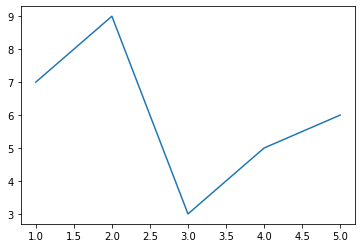

In [29]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [7, 9, 3, 5, 6]

plt.plot(x, y)

plt.show()

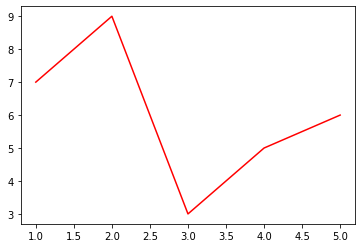

In [30]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [7, 9, 3, 5, 6]

plt.plot(x, y, "red")

plt.show()

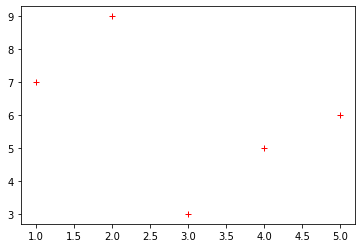

In [31]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [7, 9, 3, 5, 6]

plt.plot(x, y, "r+")

plt.show()

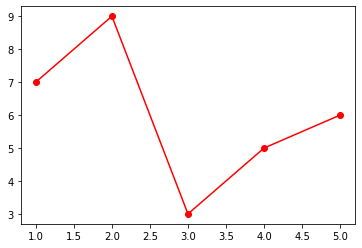

In [34]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [7, 9, 3, 5, 6]

plt.plot(x, y, "ro-")

plt.show()

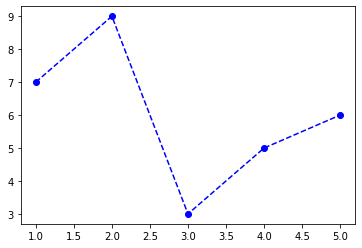

In [35]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [7, 9, 3, 5, 6]

plt.plot(x, y, "bo--")

plt.show()

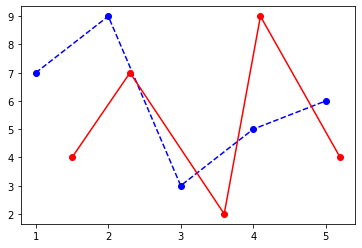

In [36]:
import matplotlib.pyplot as plt

x1 = [1, 2, 3, 4, 5]
y1 = [7, 9, 3, 5, 6]

x2 = [1.5, 2.3, 3.6, 4.1, 5.2]
y2 = [4, 7, 2, 9, 4]

plt.plot(x1, y1, "bo--")
plt.plot(x2, y2, "ro-")

plt.show()

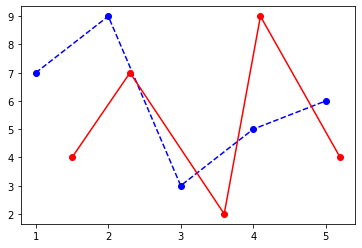

In [40]:
import matplotlib.pyplot as plt

x1 = [1, 2, 3, 4, 5]
y1 = [7, 9, 3, 5, 6]

x2 = [1.5, 2.3, 3.6, 4.1, 5.2]
y2 = [4, 7, 2, 9, 4]

plt.plot(x1, y1, "bo--")
plt.plot(x2, y2, "ro-")

plt.savefig("datos/fig_1.png")

Referencias:

* [Matplotlib con Python - W3Schools](https://www.w3schools.com/python/matplotlib_intro.asp)
* [The Python Graph Gallery](https://www.python-graph-gallery.com)
* [Matplotlib Examples](https://matplotlib.org/stable/gallery/index.html)

## 9. Cargar un dataframe de datos desde un CSV

Un `DataFrame` es una estructura similar a una tabla y consiste en una lista de filas que poseen columnas o un diccionario de columnas que contienen filas. Entonces podemos acceder a datos tabulares como los que se definen en un archivo CSV (texto plano separado por comas).

En python podemos usar la librería `pandas` y el método `read_csv(...)` para obtener la tabla de datos.

In [ ]:
! python -m pip install pandas

In [43]:
import pandas as pd

# df - DataFrame (columnas, filas) / (columnas, registros)
df = pd.read_csv("datos/calificaciones.csv")

print(df)

  NOMBRE  CALIFICACION      MATERIA
0    Ana          10.0  Matemáticas
1   Paco           6.5       Física
2  Pedro           7.0  Matemáticas
3  Karen           9.0      Español
4   Faby           8.0  Matemáticas


In [44]:
df.describe()

,CALIFICACION
count,5.000000
mean,8.100000
std,1.431782
min,6.500000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOMBRE        5 non-null      object 
 1   CALIFICACION  5 non-null      float64
 2   MATERIA       5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 248.0+ bytes


In [46]:
calificaciones = df["CALIFICACION"]

print(calificaciones) # Arreglo de numpy

0    10.0
1     6.5
2     7.0
3     9.0
4     8.0
Name: CALIFICACION, dtype: float64


In [48]:
sum(calificaciones) / len(calificaciones)

8.1

In [50]:
calif_100 = calificaciones * 10 - 1

calif_100

0    99.0
1    64.0
2    69.0
3    89.0
4    79.0
Name: CALIFICACION, dtype: float64

In [51]:
df

,NOMBRE,CALIFICACION,MATERIA
0,Ana,10.0,Matemáticas
1,Paco,6.5,Física
2,Pedro,7.0,Matemáticas
3,Karen,9.0,Español
4,Faby,8.0,Matemáticas


In [52]:
df["CALIFICACION_100"] = calif_100

df

,NOMBRE,CALIFICACION,MATERIA,CALIFICACION_100
0,Ana,10.0,Matemáticas,99.0
1,Paco,6.5,Física,64.0
2,Pedro,7.0,Matemáticas,69.0
3,Karen,9.0,Español,89.0
4,Faby,8.0,Matemáticas,79.0


In [54]:
df.to_csv("datos/calificaciones_nuevas.csv", index=None)

Referencias:

* [Pandas con Python - W3Schools](https://www.w3schools.com/python/pandas/default.asp)
* [Estructuras de Datos con Pandas](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro)
* [10 minutos con Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

## 10. Crear un archivo PDF con texto e imágenes

Los archivos PDF son los más utilizados dentro de las empresas para emitir reportes. Estos tienen la ventaja de ser estáticos y dedicados a la lectura de documentos.

En python podemos crear documentos PDF para generar reportes automatizados como tablas de datos, gráficas y demás información generada en los proyectos.

In [ ]:
! python -m pip install fpdf

In [59]:
from fpdf import FPDF

pdf = FPDF("P", "pt", "A4")

pdf.add_page()

pdf.set_font("Arial", "B", 24)

pdf.cell(0, 4, "Reporte de Utilidades")

pdf.ln()
pdf.ln()
pdf.ln()

pdf.image("datos/fig_1.png", x=100, w=400)

pdf.output("datos/reporte.pdf")

''

## 11. Extraer los datos de una hoja de Excel

Los documentos de excel son llamados también Libros y se componen de hojas. Una hoja de excel es similar a un archivo CSV, con la diferencia que las columnas están nombradas de la `A` a la `ZZ` y las filas también.

En python podemos acceder a los datos de una hoja de excel incluso en una región específica, por ejemplo, de tal fila y tal columna.

In [10]:
import pandas as pd
import openpyxl

df_hoja_1_gastos = pd.read_excel("datos/Libro.xlsx", sheet_name="Hoja1", engine="openpyxl", usecols="B:D", skiprows=2)

df_hoja_1_gastos

,Etiqueta,Monto,Fecha
0,PAPAS,13,2021-06-12
1,REFRESCO,15,2021-06-13
2,GALLETAS,14,2021-06-13
3,PAPAS,80,2021-06-19


In [9]:
df_hoja_1_compras = pd.read_excel("datos/Libro.xlsx", sheet_name="Hoja1", engine="openpyxl", usecols="K:M", skiprows=2)

df_hoja_1_compras

,Etiqueta.1,Monto.1,Fecha.1
0,GANSITO,18.0,2021-07-17
1,COCO,23.0,2021-07-18
2,NaN,NaN,NaT
3,NaN,NaN,NaT


In [16]:
df_hoja_2_etiquetas = pd.read_excel("datos/Libro.xlsx", sheet_name="Hoja2", engine="openpyxl", usecols="A:D", skiprows=0)

df_hoja_2_etiquetas

,Etiqueta,Descripcion,Cantidad,Total
0,PAPAS,Todo lo que son fritas,NaN,NaN
1,REFRESCO,Todas las bebidas con gas,NaN,NaN


In [25]:
for etiqueta in df_hoja_2_etiquetas["Etiqueta"]:
    gastos = df_hoja_1_gastos.query(f"Etiqueta == '{etiqueta}'")
    cantidad = len(gastos)
    total = sum(gastos["Monto"])
    print(etiqueta, cantidad, total)
    index_etiqueta = list(df_hoja_2_etiquetas["Etiqueta"]).index(etiqueta)
    df_hoja_2_etiquetas.at[index_etiqueta, "Cantidad"] = cantidad
    df_hoja_2_etiquetas.at[index_etiqueta, "Total"] = total
    
df_hoja_2_etiquetas

PAPAS 2 93
REFRESCO 1 15


,Etiqueta,Descripcion,Cantidad,Total
0,PAPAS,Todo lo que son fritas,2.0,93.0
1,REFRESCO,Todas las bebidas con gas,1.0,15.0


## 12. Escribir los datos en una hoja de Excel

En python podemos escribir de vuelta sobre una hoja, para actualizar o agregar nuevos valores.

In [37]:
writer = pd.ExcelWriter('datos/Libro.xlsx')

df_hoja_1_gastos.to_excel(writer, sheet_name="Hoja1", startcol=1, startrow=3, index=None, engine="openpyxl", merge_cells=True)
df_hoja_1_compras.to_excel(writer, sheet_name="Hoja1", startcol=10, startrow=3, index=None, engine="openpyxl", merge_cells=True)
df_hoja_2_etiquetas.to_excel(writer, sheet_name="Hoja2", startcol=0, startrow=0, index=None, engine="openpyxl", merge_cells=True)

writer.close()

## 13. Colocar una gráfica en una hoja de Excel

## 14. Escribir una tabla en el reporte PDF

## 15. Escribir un ticket de venta en reporte PDF

## 16. Extraer datos de un log de sistema

## 17. Graficar dos series en barras comparativas

## 18. Reespaldo de tablas en MySQL

## 19. Reespaldo de colecciones en Mongo DB

## 20. Enviar un Correo Electrónico

- Desarrollo de APIs e Interfaces Web (Flask)
- Automatización de Comandos del Sistema Operativo (OS)
* Pruebas Web Automatizadas (Selenium)

## 21. Montar un servidor web

Los servidores web son programas que se mantienen prendidos y son capaces de recibir peticiones mediante el protocolo HTTP, estas peticiones generalmente son solicitudes para acceder a recursos de la máquina dónde opera el servidor, por ejemplo, consultas de la base de datos, archivos, o información computada.

En python podemos usar la librería de `Flask` para montar un servidor que procese las peteciones de los usuarios. 

Por ejemplo, un usuario desea consumir la url `http://localhost:5000/api/productos`, `http://localhost:5000/api/reporte.pdf` `http://localhost:5000/api/grafica.png` o `http://localhost:5000/productos.html`.

In [ ]:
! python -m pip install flask

In [8]:
from flask import Flask # 1.1.2

app = Flask(__name__)

@app.get("/")
def home():
    return "Hola Flask"

app.run() # localhost:5000

TypeError: __call__() missing 1 required positional argument: 'start_response'

## 21. Recibir los parámetros de consulta

In [ ]:
from flask import request

@app.get("/api/productos") # locahost:5000/api/productos?min_precio=<float>
def get_productos():
    min_precio = request.args.get("min_precio")
    
    if not min_precio:
        min_precio = 0
    else:
        min_precio = float(min_precio)
    
    productos = [
        {
            "nombre": "Coca Cola",
            "precio": 16.5
        },
        {
            "nombre": "Galletas",
            "precio": 18.99
        },
    ]
    
    # [ <element> for <element> in <sequence> [if <condition>] ]
    # [x * 2 for x in range(20, 51)] # [40, 42, 44, 46, ..., 98, 50]
    productos_filtrados = [ producto for producto in productos if producto["precio"] >= min_precio ]
    
    return {
        "productos": productos_filtrados
    }

## 22. Crear una Aplicación Web con Flask

Las aplicaciones web se basan en estructuras HTML estilizadas con CSS y controladas por javascript. Sin embargo, existen opciones para construir los HTML y CSS sin la dependencia completa a javascript, de tal forma que otros lenguajes pueden generar los códigos html del lado del servidor a fin de mostrarsélos al usuario.

En python podemos renderizar (visualizar/pintar) páginas web generadas a partir de plantillas y datos del programa.

Por ejemplo, podemos crear una tarjeta del clima con los datos del servidor.

In [ ]:
from flask import Flask, render_template
import random

app = Flask(__name__)

@app.get("/")
def get_home():
    return render_template("index.html")

@app.get("/clima")
def get_clima():
    # TODO: Obtener los valores actuales del clima
    
    temperatura = random.uniform(0, 38)
    humedad = random.uniform(20, 98)
    
    ciudades = [
        {
            "nombre": "CDMX",
            "temperatura": random.uniform(17, 27),
            "humedad": random.uniform(45, 67)
        },
        {
            "nombre": "Monterrey",
            "temperatura": random.uniform(26, 42),
            "humedad": random.uniform(20, 50)
        },
        {
            "nombre": "Guadalajara",
            "temperatura": random.uniform(20, 30),
            "humedad": random.uniform(50, 70)
        },
    ]
    
    return render_template("clima.html", temperatura=temperatura, humedad=humedad, ciudades=ciudades)

app.run()

## 23. Manejo de hilos

Las tareas que se realizan en un programa generalmente se ejecutan en el hilo principal (proceso principal). Este proceso digamos que ejecuta instrucción por instrucción nuestro programa. Haciendo que la siguiente instrucción tenga que esperarse a que la anterior se complete.

En python podemos crear `hilos` para ejecutar procesos independientes al principal y por ejemplo, monitorear datos, escribir archivos, recopilar datos, etc. Sin que estos bloqueen el proceso principal u otros procesos.

Por ejemplo, una función que cada 20s consulte el clima desde algún API y actualice los datos gloabales a todas las funciones. De esta manera, podríamos crear una aplicación (un API) que proveea el clima con un máximo de retraso de 20 segundos. Esto haría más eficiente el programa, ya que si recibimos en el servidor 1000 peticiones de 1000 usuarios, no tenemos que hacer 1000 consultas en tiempo real del clima (saturando al sistema). Sino que a cada usuario se le respondería con el clima guardado de forma global, y el cuál está siendo actualizado de forma independiente cada 20 segundos.

Esta técnica se puede utilizar para consultas a bases de datos, llamadas a APIs  y escritura de reportes sin tener que hacer las operaciones en tiempo real, sino más bien serían tareas programadas. Se podrían programar para ser lanzadas cada tantos segundos, minutos, horas, días, etc.

In [1]:
from threading import Thread
from time import sleep
import random

contexto = {
    "contador": 0,
    "temperatura": 30
}

def task1():
    while contexto["contador"] < 5:
        print(f"[TAREA 1] {contexto['contador']}")
        contexto["contador"] += 1
        sleep(4)

def task2():
    while contexto["contador"] < 4:
        print(f"[TAREA 2] {contexto['temperatura']}")
        contexto["temperatura"] = contexto["temperatura"] + contexto["contador"] * random.uniform(-1, 1)
        sleep(10)

t1 = Thread(target=task1)
t2 = Thread(target=task2)

t1.start()
t2.start()

t1.join()
t2.join()

[TAREA 1] 0
[TAREA 2] 30
[TAREA 1] 1
[TAREA 1] 2
[TAREA 2] 29.551348760839534
[TAREA 1] 3
[TAREA 1] 4


## 24. Datos del servidor actualizados mediante un hilo

Podemos definir un hilo que controle la actualización de los datos de un contexto, para que el servidor se base en ellos. Por ejemplo, un hilo podría detectar los valores de múltiples sensores para una estación de monitoreo, haciendo que los usuarios vean los últimos valores recolectados. Estos es ideal para cuándo los valores provienen de dispositivos que extraen los datos desde sensores que no pueden ser consultados en tiempo real, por ejemplo, si llamamos al sensor de movimiento en tiempo real (cuándo consulte el usuario), podríamos bloquearlo si dos usuarios consultaran al mismo tiempo.

In [ ]:
from flask import Flask
from threading import Thread
from time import sleep
import random

context = {
    "on": True,
    "temperatura": 0,
    "humedad": 0,
    "distancia_1": 0,
    "distancia_2": 0,
    "rotacion_x": 0,
    "rotacion_y": 0,
    "rotacion_z": 0,
}

def read_sensors():
    while context["on"]:
        context["temperatura"] = random.uniform(0, 50)
        context["humedad"] = random.uniform(0, 100)
        context["distancia_1"] = random.uniform(0, 200)
        context["distancia_2"] = random.uniform(0, 200)
        context["rotacion_x"] = random.uniform(-90, 90)
        context["rotacion_y"] = random.uniform(-90, 90)
        context["rotacion_z"] = random.uniform(-90, 90)
        sleep(10)

app = Flask(__name__)

t = Thread(target=read_sensors)

t.start()

@app.get("/api/sensors")
def get_sensors():
    return context

app.run()

t.join()

## 25. Trabajar con el sistema operativo

El sistema operativo es la base donde residen y se ejecutan todos los programas. Este resuelve las operaciones más avanzadas del sistema como mandar a imprimir, asignar memoria a los programas, bloquear algún proceso específico, conectarse a los periféricos con drivers, asignar recursos avanzados como uso del GPU o la memoria gráfica, etc.

Existen principalmente dos arquitecturas principales de Sistemas Operativos (`UNIX` y `Win`), estas arquitecturas proveen interfaces primarias como la línea de comandos y el manejo de hilos, procesos, etc.

En python podemos lanzar procesos al sistema operativo, para complementar el uso de nuestros programas. Por ejemplo, si necesitamos mandar a imprimir un documento, en lugar de instalar y aprender a usar librerías complejas de python, o que ni siquiera existen, podemos mandar comandos directos al sistema operativo, para que él realice ese tipo de tareas.

In [ ]:
import subprocess

command = ['date', '+"%A %B (%d %m)"', '-u']

process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

stdout, stderr = process.communicate()

print("stdout:", stdout)
print("stderr:", stderr)

for line in stdout.decode('utf-8').split("\n"):
    print(line)